# Advanced NLP techniques with Transformers

**Goal**: Introduce `transformers` library for Natural Language Processing (NLP).

**Content**:
- Brief history of transformers and its role in advancing NLP.
- Overview of the `transformers` library by Hugging Face, including its features like pre-trained models, tokenizers, and pipelines.
- Perform tasks like text classification, summarization, sentiment analysis.

## Installing and Importing necessary modules

In [1]:
#!pip install transformers
#!pip install ipywidgets

In [ ]:
#!jupyter labextension list

In [59]:
#!pip install --upgrade jupyterlab_widgets
#!pip install --upgrade jupyterlab-plotly

In [ ]:
# Check currently installed version
#!pip show transformers

In [83]:
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import BertModel, BertTokenizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy
from spacy import displacy

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tqdm import tqdm           # Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you're done!

## Using Pre-trained Models for Simple Tasks

**Objective**: Show the ease of using pre-trained models for common NLP tasks.
- Introduction to pipelines for various tasks such as text classification, sentiment analysis, named entity recognition (NER), question-answering, and text generation.

### Example 1: Sentiment Analysis

In [87]:
# Create the sentiment analysis pipeline with an explicitly defined model
nlp_pipeline = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

In [89]:
text = "I love AI-integrated finance!"
result = nlp_pipeline(text)
result

[{'label': 'POSITIVE', 'score': 0.999790608882904}]

In [91]:
text = ["I love AI-integrated finance!", 
        "I don't like accounting.",
        "The stock market crashed today.",
        "The future of sustainability looks bright.",
        "There are major concerns about climate risks.",
        "I think I might be hungry.",
        "This book is blue."]
result = nlp_pipeline(text)

# Detailed information
for output in result:
    print(f"Label: {output['label']}, Confidence Score: {output['score']:.4f}")

Label: POSITIVE, Confidence Score: 0.9998
Label: NEGATIVE, Confidence Score: 0.9983
Label: NEGATIVE, Confidence Score: 0.9997
Label: POSITIVE, Confidence Score: 0.9997
Label: NEGATIVE, Confidence Score: 0.9545
Label: NEGATIVE, Confidence Score: 0.9923
Label: POSITIVE, Confidence Score: 0.6235


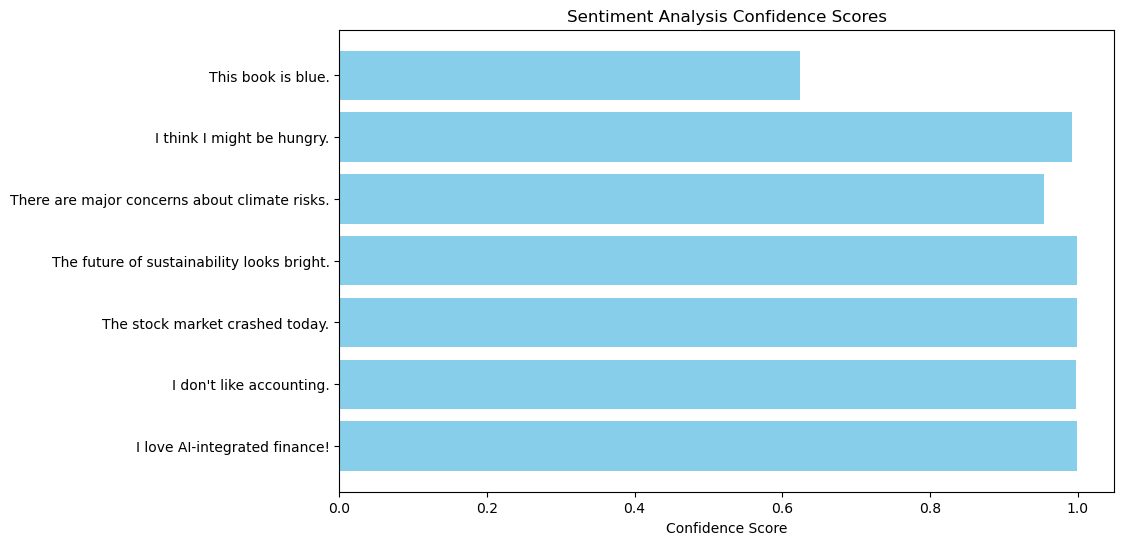

In [93]:
# Apply the sentiment analysis pipeline
results = [nlp_pipeline(text)[0] for text in text]

# Extract sentiment labels and confidence scores
labels = [result['label'] for result in results]
scores = [result['score'] for result in results]

# Visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(range(len(text)), scores, color='skyblue')
plt.yticks(range(len(text)), text)
plt.xlabel('Confidence Score')
plt.title('Sentiment Analysis Confidence Scores')
plt.show()

### Example 2: Named Entity Recognition (NER)

In [96]:
# Create the NER pipeline with an explicitly defined model
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [98]:
text = "Apple is looking at buying U.K. startup for $1 billion."
result = ner_pipeline(text)
result

[{'entity': 'I-ORG',
  'score': 0.9990897,
  'index': 1,
  'word': 'Apple',
  'start': 0,
  'end': 5},
 {'entity': 'I-LOC',
  'score': 0.999718,
  'index': 6,
  'word': 'U',
  'start': 27,
  'end': 28},
 {'entity': 'I-LOC',
  'score': 0.9987226,
  'index': 8,
  'word': 'K',
  'start': 29,
  'end': 30}]

In [100]:
# Convert to pandas DataFrame for a clear table view
df = pd.DataFrame(result)
df['entity'] = df['entity'].apply(lambda x: x.replace("I-", ""))  # Remove 'I-' for clarity
df

,entity,score,index,word,start,end
0,ORG,0.999090,1,Apple,0,5
1,LOC,0.999718,6,U,27,28
2,LOC,0.998723,8,K,29,30


In [102]:
# Pretty print each entity with some formatting
for entity in result:
    print(f"Entity: {entity['entity']}, Word: {entity['word']}, Confidence: {entity['score']:.4f}")

Entity: I-ORG, Word: Apple, Confidence: 0.9991
Entity: I-LOC, Word: U, Confidence: 0.9997
Entity: I-LOC, Word: K, Confidence: 0.9987


**NER Results Transformation**: We convert the transformers output to a format that displacy can work with, i.e., a list of dictionaries where each dictionary contains the start position, end position, and label of the entity.
Displacy Rendering: We use displacy.render() to display the entities within the text in a visually appealing manner, highlighting the entities and their labels.

In [105]:
# Transform the results into spaCy-like format
entities = [
    {
        "start": entity["start"],
        "end": entity["end"],
        "label": entity["entity"].replace("I-", "")
    }
    for entity in result
]

# Create a doc-like structure to feed into displacy
doc = {
    "text": text,
    "ents": entities,
    "title": None
}

# Visualize using displacy
displacy.render(doc, style="ent", manual=True, jupyter=True)

### Example 3: Text summarization

Model: BART (large-sized model), fine-tuned on CNN Daily Mail
- BART = Bidirectional and Auto-Regressive Transformer
- 
BART model pre-trained on English language, and fine-tuned on CNN Daily Mailp- ion

BART is a transformer encoder-encoder (seq2seq) model with a bidirectional (BERT-like) encoder and an autoregressive (GPT-like) del- text.

BART is particularly effective when fine-tuned for text generation (e.g. summarization, translation) but also works well for comprehension tasks (e.g. text classification, question answering). This particular checkpoint has been fine-tuned on CNN Daily Mail, a large collection of text-summary pairs.

In [157]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In this example:

- `ARTICLE` is the text you want to summarize.
- `max_length` sets the maximum length of the generated summary (in tokens).
- `min_length` sets the minimum length of the generated summary (in tokens).
- `length_penalty` controls the penalty for generating longer summaries.
- `num_beams` sets the number of beams to use for beam search during summarization.

**Control the summary length**: You can control how short or long the summary has to be by setting the min and max tokens allowed.

In [197]:
# Too short?
result=summarizer(ARTICLE, max_length=30, min_length=5, do_sample=False)
print("\nGenerated Summary:\n", result[0]['summary_text'])


Generated Summary:
 Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree"


In [199]:
# Too long?
result=summarizer(ARTICLE, max_length=200, min_length=100, do_sample=False)
print("\nGenerated Summary:\n", result[0]['summary_text'])


Generated Summary:
 Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men, and at one time, she was married to eight men at once. Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force. If convicted, she faces up to four years in prison.


In [201]:
# Just right?
result=summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False, length_penalty=2.0, num_beams=4)
print("\nGenerated Summary:\n", result[0]['summary_text'])


Generated Summary:
 Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.


**Check the summary length**: by tokenizing the summary text and counting the tokens.

In [195]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the text and count the number of tokens
summary_text = result[0]['summary_text']
tokens = tokenizer.tokenize(summary_text)
token_count = len(tokens)
print(f"There are {token_count} tokens.")

There are 26 tokens.


---

## Zero-Shot Classifier model

**Zero-shot models** trained on **NLI datasets** generalize well to tasks like **sentiment analysis** or **topic classification** by treating them as NLI problems. By modifying the hypothesis template to better match the task, you can guide the model to produce more accurate predictions. Experimenting with different templates is a powerful way to fine-tune the performance of a zero-shot model.


The default model is set to BART, but you can choose any pre-trained model from the HuggingFace [Hub](https://huggingface.co/models?pipeline_tag=zero-shot-classification&sort=downloads).


In [108]:
# This way the pipeline will choose the default pretrained model:
classifier = pipeline("zero-shot-classification")

# This way you can control which model to choose:
#classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Example 1: Zero-Shot Classifier for Sentiment prediction
Trying to get the positive/negative prediction based on a given review.

In [111]:
text = "The movie was so boring, I actually fell sleep in the first 20 minutes."

In [113]:
possible_class_names = ["positive", "negative"]

In [115]:
result = classifier(text, possible_class_names)
result

{'sequence': 'The movie was so boring, I actually fell sleep in the first 20 minutes.',
 'labels': ['negative', 'positive'],
 'scores': [0.988088846206665, 0.011911144480109215]}

It is important to note that the library will automatically sort the labels based on the scores, so we can always get the first index as the predicted label. 

### Example 2: Zero-Shot Classifier for Topic allocation

In [119]:
text=["I have a problem with my iphone that needs to be resolved asap!!"]

In [121]:
possible_class_names = ["urgent", "not urgent", "phone", "tablet", "computer"]

In [123]:
result = classifier(text, possible_class_names)
result

[{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
  'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
  'scores': [0.5036360621452332,
   0.47879910469055176,
   0.012600294314324856,
   0.0026557769160717726,
   0.0023087728768587112]}]

If more than one candidate label can be correct, pass `multi_label=True` to calculate each class independently:

In [126]:
result = classifier(text, possible_class_names, multi_label=True)
result

[{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
  'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
  'scores': [0.9985762238502502,
   0.9949977993965149,
   0.1349702775478363,
   0.000678903074003756,
   0.00041480286745354533]}]

### Example 3: Analysis of IMDB movie database reviews

In [129]:
dataset = pd.read_csv("./data/IMDB_dataset_1K.csv")
dataset[:100]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


In [131]:
possible_class_names = ["positive", "negative"]

In [133]:
# Pre-allocate your computer memory for storing results
results = []
targets = []

for idx, item in tqdm(dataset[:100].iterrows()):
    result = classifier(item['review'], possible_class_names)

    results.append(result['labels'][0])
    targets.append(item['sentiment'])

100it [01:47,  1.07s/it]


In [136]:
accuracy = accuracy_score(results, targets)
print(f"Accuracy: {accuracy}")

Accuracy: 0.88


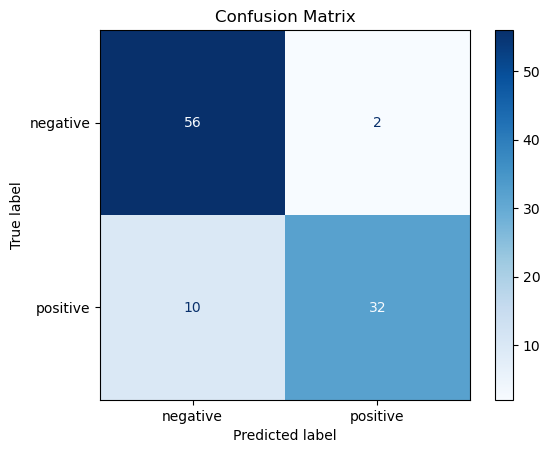

In [138]:
# Create confusion matrix
cm = confusion_matrix(targets, results, labels=np.unique(targets))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(targets))
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.title('Confusion Matrix')
plt.show()

#### Precision, Recall, and F1-Score

There are some additional metrics you can consider. These metrics are often used in classification tasks, especially in imbalanced datasets where accuracy alone might be misleading:
- **Precision**: Proportion of correctly predicted positive observations to the total predicted positives.
- **Recall** (Sensitivity): Proportion of correctly predicted positive observations to all observations in the actual class.
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between them.

Review [the article on Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix) for detaild explanation of these measures and how they are calculated.

In [140]:
# Get precision, recall, f1-score, and support
report = classification_report(targets, results)
print(report)

              precision    recall  f1-score   support

    negative       0.85      0.97      0.90        58
    positive       0.94      0.76      0.84        42

    accuracy                           0.88       100
   macro avg       0.89      0.86      0.87       100
weighted avg       0.89      0.88      0.88       100



#### Matthews Correlation Coefficient (MCC)
The MCC is a balanced measure that can be used even if the classes are of very different sizes.

In [143]:
# Calculate MCC
mcc = matthews_corrcoef(targets, results)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.7579030403924275


#### Cohen's Kappa
Cohen’s Kappa is a statistic that measures inter-rater agreement for categorical items. It’s generally thought to be a more robust measure than accuracy because it takes into account the possibility of agreement occurring by chance.

In [146]:
# Calculate Cohen's Kappa
kappa = cohen_kappa_score(targets, results)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.7470489038785835


#### Model Perfromance Assessment Summary:
- **Accuracy** is not always sufficient, especially for imbalanced datasets.
- **Precision**, **Recall**, and **F1-Score** give more insight into the model’s performance.
- **Confusion Matrices** are excellent for visualizing performance.
- **MCC**, and **Cohen’s Kappa** provide more advanced measures of classification performance.

### How Zero-Shot Models are Trained?
Zero-shot models are powerful tools that allow us to classify text without needing specific training for each task. These models are commonly trained on **Natural Language Inference (NLI)** datasets, which consist of sequence pairs labeled to show the relationship between a "premise" and a "hypothesis."

In NLI, the goal is to determine if the hypothesis is logically true, false, or neutral given the premise. This setup is how zero-shot models learn to generalize across tasks.

*Example of NLI Training:*
- **Premise**: "Cars are racing on the track."
- **Hypothesis**: "A car race is happening."
- **Label**: True

The model learns to predict whether the hypothesis logically follows from the premise (True/False/Neutral). It uses this logic to understand relationships between different types of sequences.

### Applying NLI to Zero-Shot Classification:
By leveraging the same idea from NLI training, we can use a premise-hypothesis pair to classify a new sequence into categories without any task-specific training. 

*Here's an example:*
- **Premise**: "The movie was so boring, I actually fell asleep."
- **Hypothesis**: "This example is negative."

If the model has been trained well, it will predict that this hypothesis is `True`, thus classifying the premise as having a negative sentiment.

This same approach is what Hugging Face's zero-shot models use. When classifying text, a template is used in the hypothesis, like:

- **Premise**: Your input text
- **Hypothesis** Template: "This example is {}."

For each possible class (e.g., "positive," "negative"), the model tries to determine if the hypothesis is true.

### Customizing the Hypothesis Template for Better Accuracy
You can improve the model's accuracy by customizing the hypothesis template to better suit the task at hand. For example, instead of using the default template:

- "This example is {}."

You can provide more task-specific information to guide the model. When trying to classify topics like "economy" or "politics," a more informative template might be:

- "The text is about {}."

*Example of Topic Classification with a Custom Template:*
- **Premise**: "The stock market crashed today due to economic uncertainty."
- **Hypothesis Template**: "The text is about {}."

This approach may yield more accurate predictions because the model is given clearer instructions about what to focus on. For instance, the hypothesis *"The text is about the economy"* or *"The text subject is about the economy"* is more specific than the general *"This example is about the economy.*"

### Why Does This Work?
When you provide more information in the hypothesis template, the model has a better understanding of the task's context. This enables it to make more informed predictions, potentially improving accuracy:
### Summary

- Ideally, providing more information about the task in the **hypothesis template** will result in more accurate results.
- In theory, it is expected to yield better results if we use the template *"The text subject is about {}."* when attempting to predict text topics (like the economy, politics, sport,…) instead of the default *"This example is {}."*

Let's see if changing the template sequence will increase the accuracy based on our previous IMDB example of sentiment classification of movie reviews:cy.

In [150]:
possible_class_names = ["positive", "negative"]
hypothesis_template = "The sentiment of this review is {}."

# Pre-allocate your computer memory for storing results
results = []
targets = []

for idx, item in tqdm(dataset[:100].iterrows()):
    result = classifier(item['review'], possible_class_names, hypothesis_template = hypothesis_template)

    results.append(result['labels'][0])
    targets.append(item['sentiment'])

100it [01:46,  1.07s/it]


Accuracy: 0.93


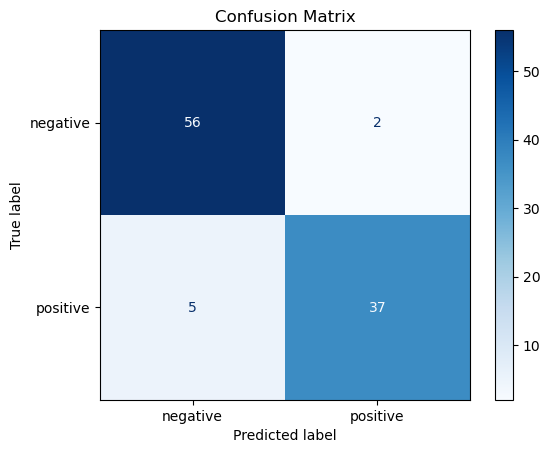

In [154]:
accuracy = accuracy_score(results, targets)
print(f"Accuracy: {accuracy}")

# Create confusion matrix
cm = confusion_matrix(targets, results, labels=np.unique(targets))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(targets))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

---

# Challenges

## Challenges in text summarization

In the example above, we observed that BART has effectively distilled the key information from the original text, providing a concise and coherent summary. Adjusting parameters such as `max_length`, `min_length`, and others in the summarization process can further tailor the output to meet specific requirements or preferences.

Now, here are a few example input texts that might pose a challenge for summarization:

In [211]:
# Load the BART summarization pipeline
#summarizer = pipeline("summarization")   # loads default model "sshleifer/distilbart-cnn-12-6"
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [217]:
# set min and max token lengths for the summaries
my_max = 35
my_min = 10

In [219]:
# Example 1: Scientific Research Abstract
example1 = """
Recent advancements in quantum computing algorithms have led to breakthroughs in solving complex optimization problems. Utilizing entanglement and superposition principles, these algorithms show promise in revolutionizing fields such as cryptography, materials science, and artificial intelligence.
"""
summary1 = summarizer(example1, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 2: Philosophical Passage
example2 = """
In the intricate tapestry of human existence, the pursuit of meaning transcends temporal boundaries. Philosophical discourse surrounding existentialism and the nature of consciousness invites contemplation on the subjective essence of being, challenging conventional notions of reality and self-awareness.
"""
summary2 = summarizer(example2, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 3: Legal Document Excerpt
example3 = """
Pursuant to Article XVII, Section 3 of the Constitution, the contractual obligations herein enumerated shall be binding upon the parties hereto. Notwithstanding any provision to the contrary, indemnification clauses extend to all affiliated entities and successors, and no waiver of rights shall be construed as a precedent for future waivers.
"""
summary3 = summarizer(example3, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 4: Medical Research Abstract
example4 = """
A comprehensive study on the etiology and pathophysiology of autoimmune disorders reveals intricate interactions between genetic predisposition, environmental factors, and immunological dysregulation. The identification of potential biomarkers presents novel avenues for targeted therapeutic interventions and personalized medicine approaches.
"""
summary4 = summarizer(example4, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 5: Complex Technical Description
example5 = """
In the domain of neural network architecture, the implementation of attention mechanisms and recurrent units requires meticulous consideration of gradient flow, weight initialization, and optimization algorithms. Asynchronous training paradigms and ensemble learning strategies further complicate the landscape, demanding a nuanced approach to model convergence and generalization.
"""
summary5 = summarizer(example5, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 6: Ambiguous Input
example6 = """ The project aims to develop a novel solution for addressing bank issues. The bank's challenges have been diverse and complex, requiring innovative approaches. Our team is excited to unveil a groundbreaking initiative that will transform the banking landscape.
"""
summary6 = summarizer(example6, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 7: Highly Technical Content
example7 = """ In the realm of quantum entanglement, researchers have uncovered novel phenomena that challenge traditional interpretations. The interplay between non-local correlations and quantum superposition is at the forefront of cutting-edge quantum information processing.
"""
summary7 = summarizer(example7, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 8: Long and Complex Document
example8 = """ In this comprehensive review, we analyze the historical evolution of artificial intelligence, covering key milestones and breakthroughs. From early symbolic systems to modern neural networks, the journey reveals the complexity and diversity of AI development.
"""
summary8 = summarizer(example8, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 9: Texts with Multiple Themes
example9 = """ The conference explored topics ranging from environmental sustainability to advancements in renewable energy technologies. With sessions on climate change mitigation and innovative energy solutions, participants engaged in a multidisciplinary dialogue.
"""
summary9 = summarizer(example9, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)

# Example 10: Creative Writing Style
example10 = """ In the poetic landscape of existential musings, the soul traverses realms of introspection, dancing with shadows of ephemeral truths. The tapestry of existence unfolds in poetic cadence, where each stanza whispers the secrets of being.
"""
summary10 = summarizer(example10, max_length=my_max, min_length=my_min, length_penalty=2.0, num_beams=4)


# Print the summaries
print("\nExample 1 Summary:\n", summary1[0]['summary_text'])
print("\nExample 2 Summary:\n", summary2[0]['summary_text'])
print("\nExample 3 Summary:\n", summary3[0]['summary_text'])
print("\nExample 4 Summary:\n", summary4[0]['summary_text'])
print("\nExample 5 Summary:\n", summary5[0]['summary_text'])
print("\nExample 6 Summary:\n", summary6[0]['summary_text'])
print("\nExample 7 Summary:\n", summary7[0]['summary_text'])
print("\nExample 8 Summary:\n", summary8[0]['summary_text'])
print("\nExample 9 Summary:\n", summary9[0]['summary_text'])
print("\nExample 10 Summary:\n", summary10[0]['summary_text'])


Example 1 Summary:
  Quantum computing algorithms have led to breakthroughs in solving complex optimization problems . These algorithms show promise in revolutionizing fields such as cryptography, materials science, and artificial intelligence

Example 2 Summary:
  Philosophical discourse surrounding existentialism invites contemplation on the subjective essence of being, challenging conventional notions of reality and self-awareness .

Example 3 Summary:
  Article XVII, Section 3 of the Constitution, the contractual obligations herein enumerated shall be binding upon the parties hereto . indemnification clauses extend to all affiliated

Example 4 Summary:
  A comprehensive study on the etiology and pathophysiology of autoimmune disorders reveals intricate interactions between genetic predisposition, environmental factors, and immunological dysregulation . The

Example 5 Summary:
  In the domain of neural network architecture, the implementation of attention mechanisms and recurrent u

In [225]:
# Parameters for summarization
my_max = 35
my_min = 10

# List of examples to summarize
examples = [
    """Recent advancements in quantum computing algorithms have led to breakthroughs in solving complex optimization problems. Utilizing entanglement and superposition principles, these algorithms show promise in revolutionizing fields such as cryptography, materials science, and artificial intelligence.""",
    """In the intricate tapestry of human existence, the pursuit of meaning transcends temporal boundaries. Philosophical discourse surrounding existentialism and the nature of consciousness invites contemplation on the subjective essence of being, challenging conventional notions of reality and self-awareness.""",
    """Pursuant to Article XVII, Section 3 of the Constitution, the contractual obligations herein enumerated shall be binding upon the parties hereto. Notwithstanding any provision to the contrary, indemnification clauses extend to all affiliated entities and successors, and no waiver of rights shall be construed as a precedent for future waivers.""",
    """A comprehensive study on the etiology and pathophysiology of autoimmune disorders reveals intricate interactions between genetic predisposition, environmental factors, and immunological dysregulation. The identification of potential biomarkers presents novel avenues for targeted therapeutic interventions and personalized medicine approaches.""",
    """In the domain of neural network architecture, the implementation of attention mechanisms and recurrent units requires meticulous consideration of gradient flow, weight initialization, and optimization algorithms. Asynchronous training paradigms and ensemble learning strategies further complicate the landscape, demanding a nuanced approach to model convergence and generalization.""",
    """The project aims to develop a novel solution for addressing bank issues. The bank's challenges have been diverse and complex, requiring innovative approaches. Our team is excited to unveil a groundbreaking initiative that will transform the banking landscape.""",
    """In the realm of quantum entanglement, researchers have uncovered novel phenomena that challenge traditional interpretations. The interplay between non-local correlations and quantum superposition is at the forefront of cutting-edge quantum information processing.""",
    """In this comprehensive review, we analyze the historical evolution of artificial intelligence, covering key milestones and breakthroughs. From early symbolic systems to modern neural networks, the journey reveals the complexity and diversity of AI development.""",
    """The conference explored topics ranging from environmental sustainability to advancements in renewable energy technologies. With sessions on climate change mitigation and innovative energy solutions, participants engaged in a multidisciplinary dialogue.""",
    """In the poetic landscape of existential musings, the soul traverses realms of introspection, dancing with shadows of ephemeral truths. The tapestry of existence unfolds in poetic cadence, where each stanza whispers the secrets of being."""
]

# Corresponding comments/descriptions
comments = [
    "Scientific Research Abstract",
    "Philosophical Passage",
    "Legal Document Excerpt",
    "Medical Research Abstract",
    "Complex Technical Description",
    "Ambiguous Input",
    "Highly Technical Content",
    "Long and Complex Document",
    "Texts with Multiple Themes",
    "Creative Writing Style"
]
# Function to summarize text
def summarize_text(text, max_length, min_length):
    return summarizer(text, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4)[0]['summary_text']

# Loop through examples, summarize, and print results
for idx, example in enumerate(examples, start=1):
    summary = summarize_text(example, my_max, my_min)
    #print(f"\nExample {idx} ({comments[idx-1]})\n", "Raw Text: ", example, "\n Summary:", summary)
    
    # Print the result in a well-formatted way
    print(f"\n{'='*40}")
    print(f"Example {idx} - {comments[idx-1]}")
    print(f"{'-'*40}")
    print(f"Raw Text:\n{example}")
    print(f"{'-'*40}")
    print(f"Summary:\n{summary}")
    print(f"{'='*40}\n")


Example 1 - Scientific Research Abstract
----------------------------------------
Raw Text:
Recent advancements in quantum computing algorithms have led to breakthroughs in solving complex optimization problems. Utilizing entanglement and superposition principles, these algorithms show promise in revolutionizing fields such as cryptography, materials science, and artificial intelligence.
----------------------------------------
Summary:
 Recent advancements in quantum computing algorithms have led to breakthroughs in solving complex optimization problems . These algorithms show promise in revolutionizing fields such as cryptography, materials science,


Example 2 - Philosophical Passage
----------------------------------------
Raw Text:
In the intricate tapestry of human existence, the pursuit of meaning transcends temporal boundaries. Philosophical discourse surrounding existentialism and the nature of consciousness invites contemplation on the subjective essence of being, challengin

## Key issues from these results

**Limitations:**

- **Domain Specificity**: BART, like many pre-trained models, may not perform optimally in highly specialized or niche domains where specific knowledge is equired.
- **Handling Ambiguity**: The model may struggle with ambiguous language or context, leading to summaries that might not accurately reflect the intended meaning.
- **Length Constraints**: BART has limitations on input length, and very long documents may result in truncated summaries that miss important context or details.
- **Handling of Rare Terms**: The model may not effectively handle rare or out-of-vocabulary terms, impacting its ability to generate accurate summaries for texts containg such terms.
- **Sensitive to Input Phrasing**: The model's output can be sensitive to slight variations in input phrasing, and small changes may lead to significantly different summaries.

**Specific examples:**

- Example 6: The summary lacks specificity and fails to capture diverse and complex challenges.
- Example 7: The summary may lack depth in understanding highly technical content.
- Example 8: Due to length limitations, the summary misses crucial information about AI development.
- Example 9: The summary captures one theme but fails to convey the multidisciplinary nature of the conference.
- Example 10: The model may struggle to capture the artistic nuances and poetic essence.

What do you think the issue is with examples #1 - #5?


**Improvements:**

- **Fine-Tuning for Specific Domains**: Fine-tuning the model on domain-specific data can enhance its performance in specialized areas, making it more adaptable to particular industries or topics.
- **Enhanced Handling of Ambiguity**: Further research and model improvements could focus on enhancing the model's ability to handle ambiguous language and context, reducing the risk of generating misleading summaries.
- **Increased Input Length**: Improvements in handling longer input texts without truncation would be valuable, especially for documents where context plays a critical role in generating accurate summaries.
- **Handling of Rare Terms**: Implementing methods to better handle rare or out-of-vocabulary terms, perhaps through more robust subword tokenization or domain-specific vocabularies, could enhance the model's coverage.
- **Improved Robustness to Input Variations**: Enhancements to make the model less sensitive to slight variations in input phrasing would contribute to more consistent and reliable summarization results.
- **User-Defined Constraints**: Allowing users to set constraints or preferences for the summarization process (e.g., specifying key content to include or exclude) could improve the customization and usefulness of the generated summaries.
- **Incorporation of Document Structure**: Improving the model’s understanding of document structure and hierarchy could lead to more coherent summaries, particularly in documents with clear sections or subsections.
- **User Feedback Integration**: Implementing mechanisms to incorporate user feedback into the fine-tuning process could enhance the model’s adaptability to specific -  needs and preferences.
- **Multimodal Integration**: Integrating information from multiple modalities (text, images, etc.) could lead to more comprehensive and informative summaries, especially for documents that include non-textual content.
- **Continuous Evaluation and Updating**: Regularly evaluating the model’s performance and updating it with new, diverse data can help ensure that it remains effective across a wide range of use cases and reflects evolving language patterns.

**Conclusion**

In conclusion, BART model emerges as a robust solution for text summarization tasks, showcasing commendable proficiency in distilling comprehensive information into coherent and contextually relevant summaries. Its transformer architecture enables the model to capture intricate relationships within the input text, contributing to its effectiveness. However, certain limitations, such as sensitivity to domain specificity, ambiguous language, and document length constraints, necessitate careful consideration when applying BART. To harness its full potential, users can explore fine-tuning for specific domains, incorporate user-defined constraints, and stay informed about ongoing advancements. Despite its current constraints, BART represents a significant stride in the realm of automated summarization, offering a versatile tool for extracting key insights from diverse textual data.